In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn import preprocessing as pproc
import scipy.stats as stats
import missingno as msno
import statsmodels.api as sm

sns.set(font_scale = 1.5, rc = {'figure.figsize':(8,8)})

sns.set_style("white")


In [103]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv')

data

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,Winslow Homer,4.0,1991,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.377853,407,1,0,White
3158,Winslow Homer,5.0,1995,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.335776,407,1,0,White
3159,Winslow Homer,6.0,2001,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.324369,407,1,0,White
3160,Winslow Homer,7.0,2007,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.323356,407,1,0,White


In [104]:
def Age_group_data(year):
    if 1926 <= year <= 1957:
        return "Young"
    elif 1957 < year <= 1980:
        return "Middle"
    else:
        return "Elderly"

# Apply the Age_group_data function to each row of the 'year' column
data['Age_group'] = data['year'].apply(Age_group_data)

# Print the updated DataFrame
print(data)

# What does the data look like
data.head()

        artist_name  edition_number  year artist_nationality  \
0     Aaron Douglas             9.0  1991           American   
1     Aaron Douglas            10.0  1996           American   
2     Aaron Douglas            11.0  2001           American   
3     Aaron Douglas            12.0  2005           American   
4     Aaron Douglas            13.0  2009           American   
...             ...             ...   ...                ...   
3157  Winslow Homer             4.0  1991           American   
3158  Winslow Homer             5.0  1995           American   
3159  Winslow Homer             6.0  2001           American   
3160  Winslow Homer             7.0  2007           American   
3161  Winslow Homer             8.0  2011           American   

     artist_nationality_other artist_gender                artist_race  \
0                    American          Male  Black or African American   
1                    American          Male  Black or African American   
2        

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi,Age_group
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White,Elderly
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White,Elderly
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White,Elderly
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White,Elderly
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White,Elderly


In [105]:
# Make a copy of the data
dataCopy = data.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]

  # Skewness
  skewness = round((dataRed_i.skew()), 3)

  # Kurtosis
  kurtosis = round((dataRed_i.kurt()), 3)

  # Print a blank row
  print('')

  # Print the column name
  print(i_col)

  # Print skewness and kurtosis
  print('skewness =', skewness, 'kurtosis =', kurtosis)


edition_number
skewness = 0.205 kurtosis = -1.083

year
skewness = -1.068 kurtosis = 1.073

space_ratio_per_page_total
skewness = 3.113 kurtosis = 13.936

artist_unique_id
skewness = 0.126 kurtosis = -1.111

moma_count_to_year
skewness = 3.378 kurtosis = 13.889

whitney_count_to_year
skewness = 3.23 kurtosis = 10.929


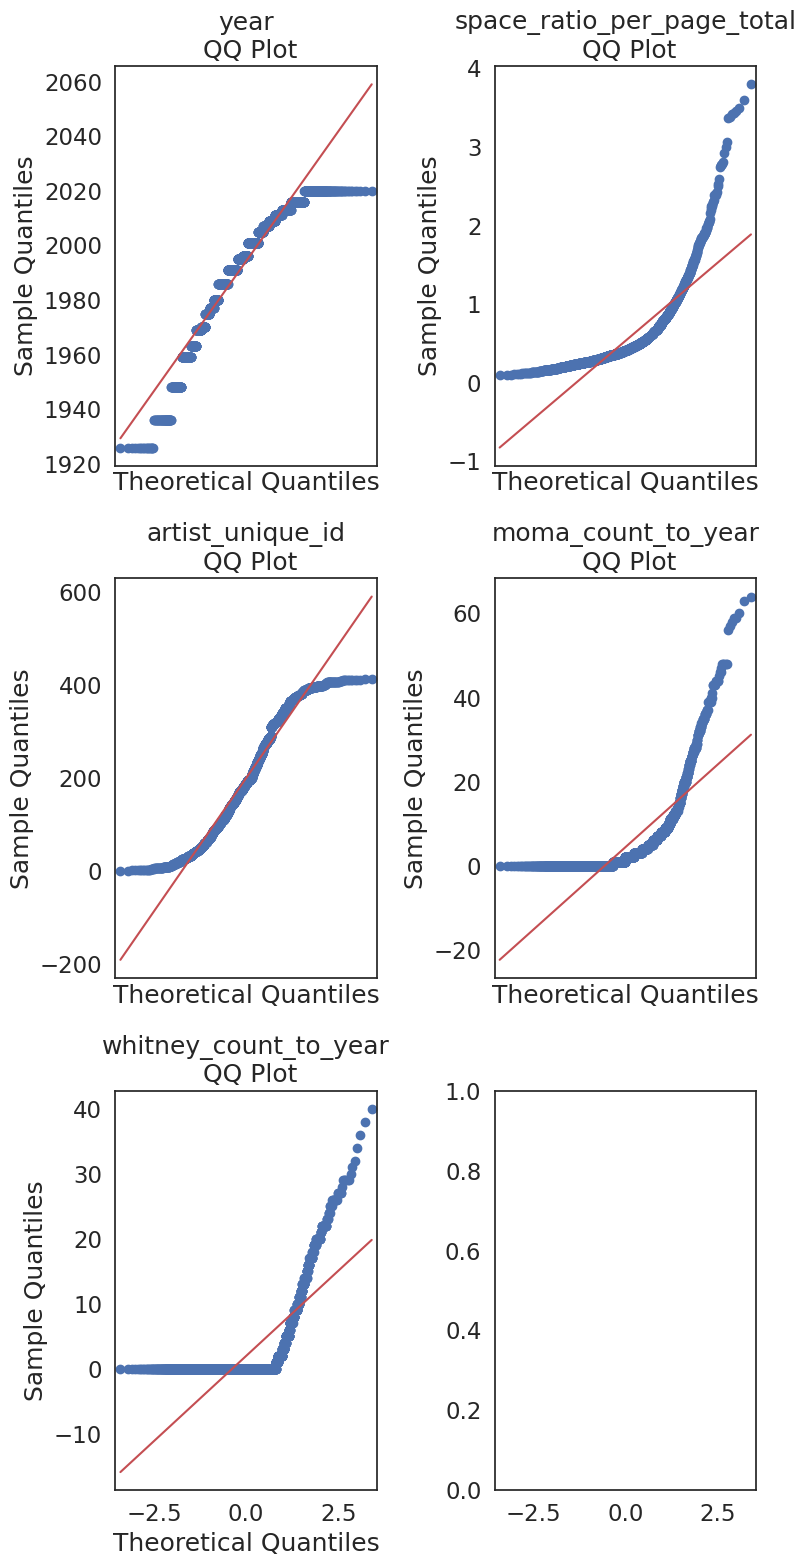

In [106]:
# Make a copy of the data
dataCopy = data.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Drop Outcome, binary columns are never normally distributed
dataCopyFin1 = dataCopyFin.drop('edition_number', axis = "columns")

# Select only numerical columns
dataRed = dataCopyFin1.select_dtypes(include = np.number)

# Combine multiple plots, the number of columns and rows is derived from the number of numerical columns from above.
fig, axes = plt.subplots(ncols = 2, nrows = 3, sharex = True, figsize = (2 * 4, 4 * 4))

# Generate figures for all numerical grouped data subsets
for k, ax in zip(dataRed.columns, np.ravel(axes)):
    sm.qqplot(dataRed[k], line = 's', ax = ax)
    ax.set_title(f'{k}\n QQ Plot')
plt.tight_layout()
plt.show()

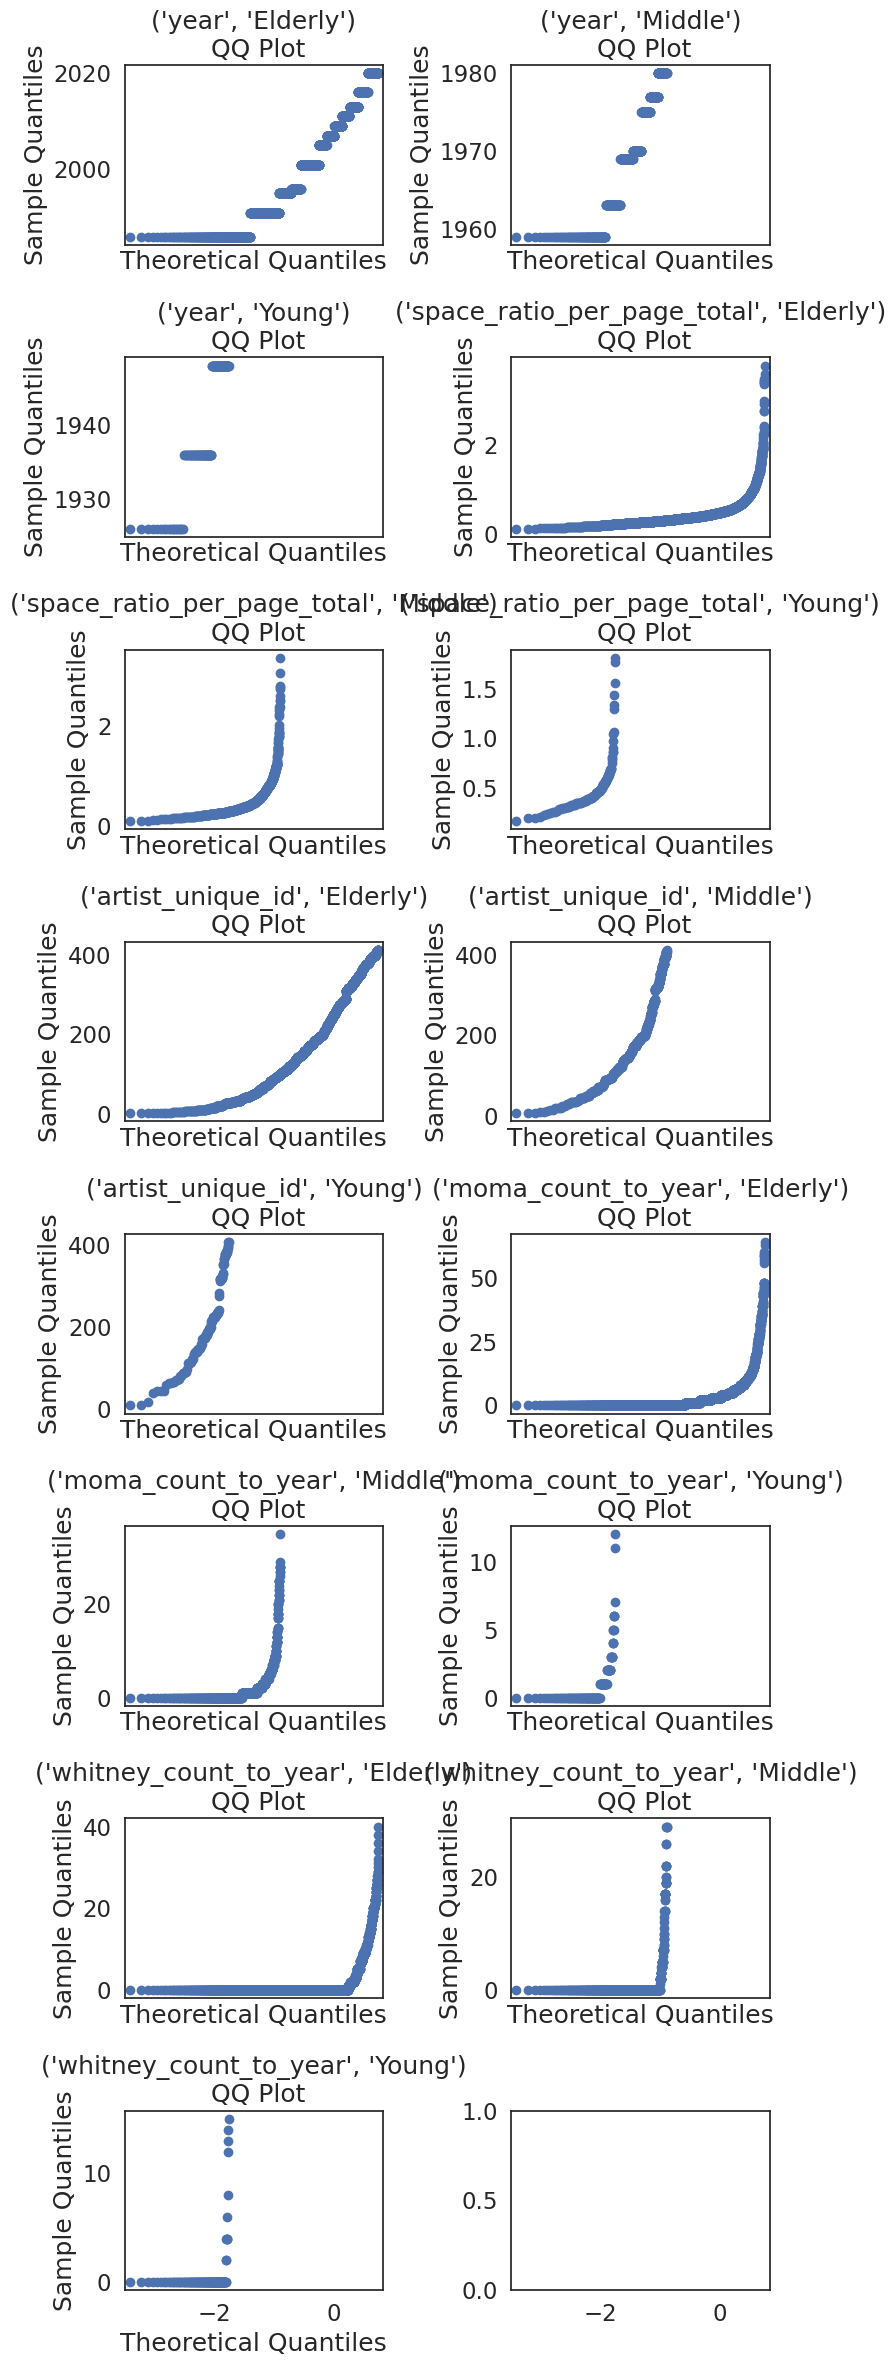

In [107]:
# Make a copy of the data
dataCopy = data.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Create a new column named in x, which is filled with the dataset rownames
dataCopyFin.index.name = 'Index'

# Reset the rownames index (not a column)
dataCopyFin.reset_index(inplace = True)

# Pivot the data from long-to-wide with pivot, using Date as the index, so that a column is created for each Group and numerical column subset
dataPivot = dataCopyFin.pivot(index = 'Index', columns = 'Age_group', values = ['year', 'space_ratio_per_page_total','artist_unique_id', 'moma_count_to_year', 'whitney_count_to_year'])

# Select only numerical columns
dataRed = dataPivot.select_dtypes(include = np.number)

# Combine multiple plots, the number of columns and rows is derived from the number of numerical columns from above.
fig, axes = plt.subplots(ncols = 2, nrows = 8, sharex = True, figsize = (2 * 4, 6 * 4))

# Generate figures for all numerical grouped data subsets
for k, ax in zip(dataRed.columns, np.ravel(axes)):
    sm.qqplot(dataRed[k], line = 's', ax = ax)
    ax.set_title(f'{k}\n QQ Plot')
plt.tight_layout()
plt.show()

In [108]:
# Filter space_ratio_per_page_total greater than 2
Ins = data[data.space_ratio_per_page_total > 2]

# Select only Insulin
InsMod = Ins.filter(["space_ratio_per_page_total"], axis = "columns")

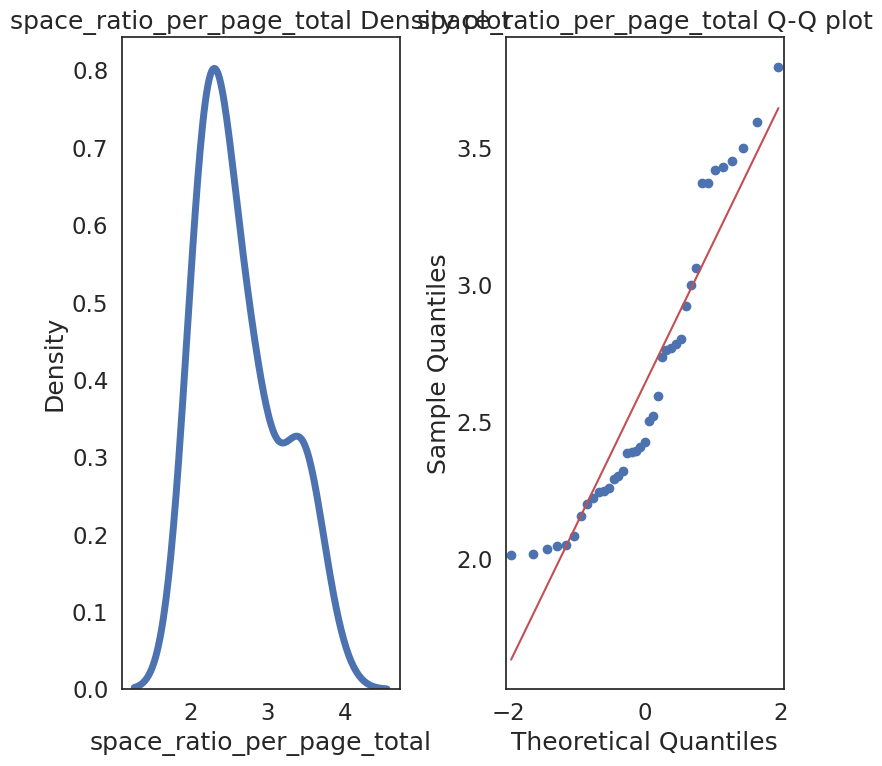

In [109]:
# Square-root transform the data in a new column
InsMod['Ins_Sqrt'] = np.sqrt(InsMod['space_ratio_per_page_total'])

# Specify desired column
col = InsMod.space_ratio_per_page_total

# Specify desired column
i_col = InsMod.Ins_Sqrt

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('space_ratio_per_page_total Density plot')

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('space_ratio_per_page_total Q-Q plot')
plt.tight_layout()
plt.show()

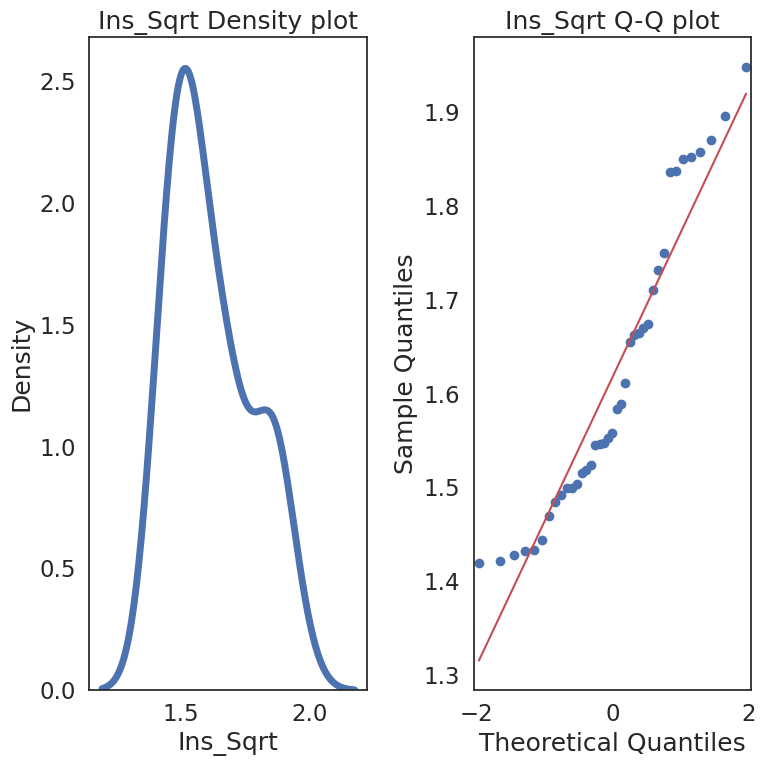

In [110]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Sqrt Density plot')

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Sqrt Q-Q plot')
plt.tight_layout()
plt.show()

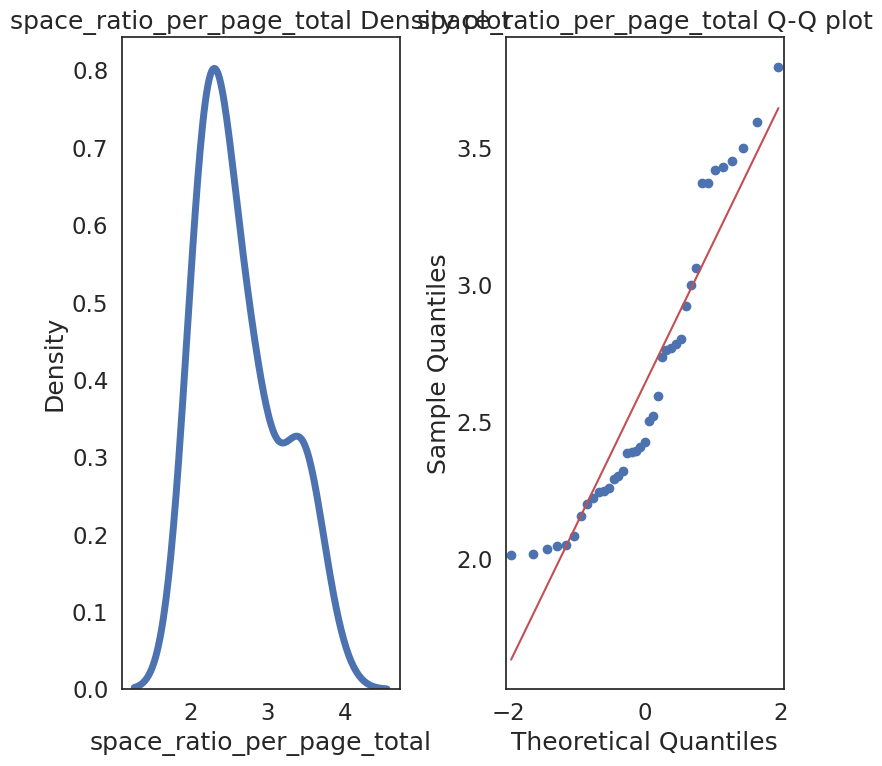

In [111]:
# Logarithmic transform the data in a new column
InsMod['Ins_Log'] = np.log(InsMod['space_ratio_per_page_total'] + 1)

# Specify desired column
col = InsMod.space_ratio_per_page_total

# Specify desired column
i_col = InsMod.Ins_Log

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('space_ratio_per_page_total Density plot')

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('space_ratio_per_page_total Q-Q plot')
plt.tight_layout()
plt.show()

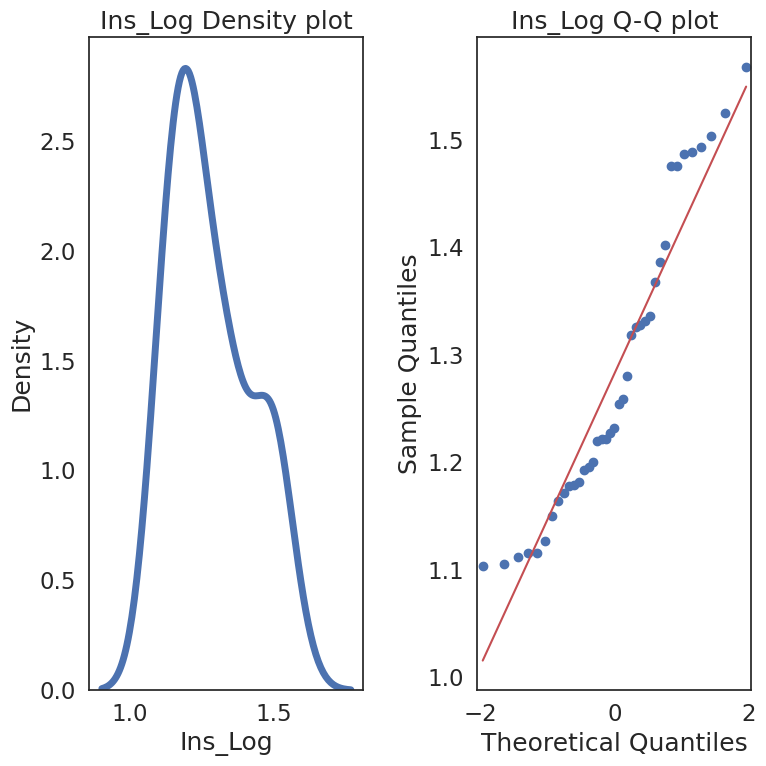

In [112]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Log Density plot')

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Log Q-Q plot')
plt.tight_layout()
plt.show()

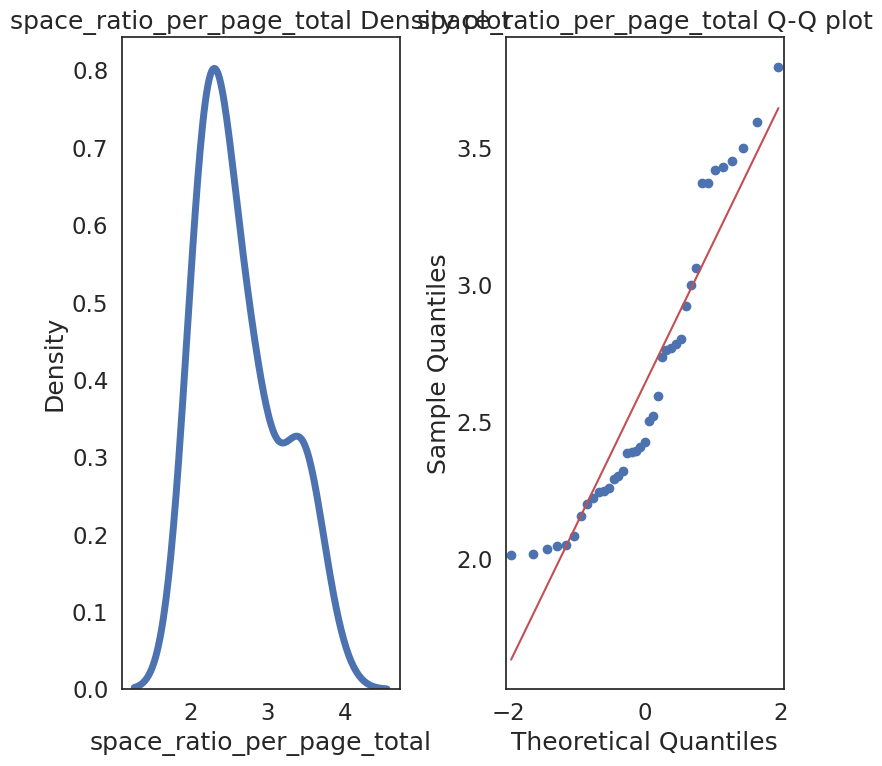

In [113]:
# Inverse transform the data in a new column
InsMod['Ins_Inv'] = 1/InsMod.space_ratio_per_page_total

# Specify desired column
col = InsMod.space_ratio_per_page_total

# Specify desired column
i_col = InsMod.Ins_Inv

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('space_ratio_per_page_total Density plot')

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('space_ratio_per_page_total Q-Q plot')
plt.tight_layout()
plt.show()

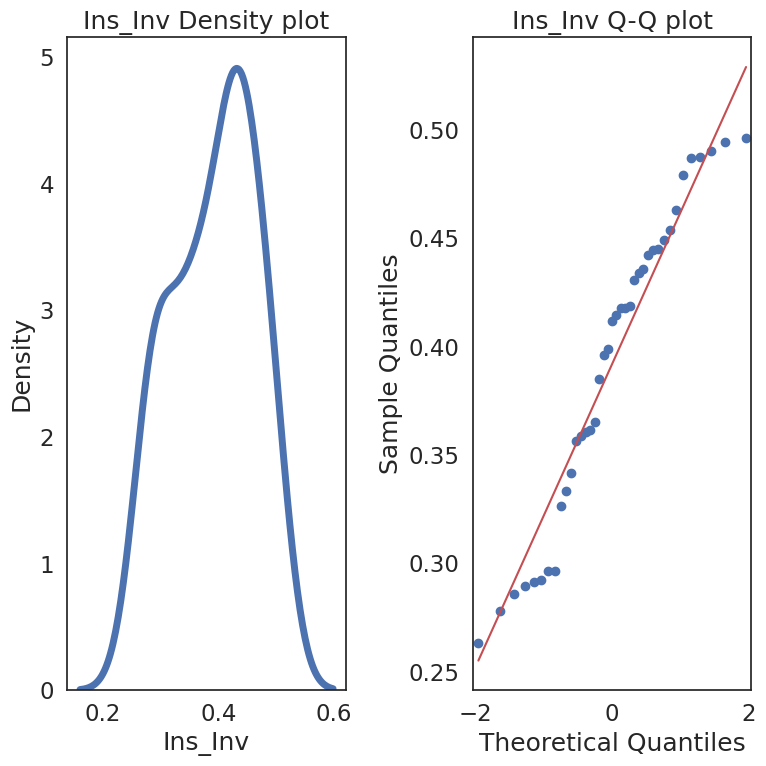

In [114]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Inv Density plot')

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Inv Q-Q plot')
plt.tight_layout()
plt.show()

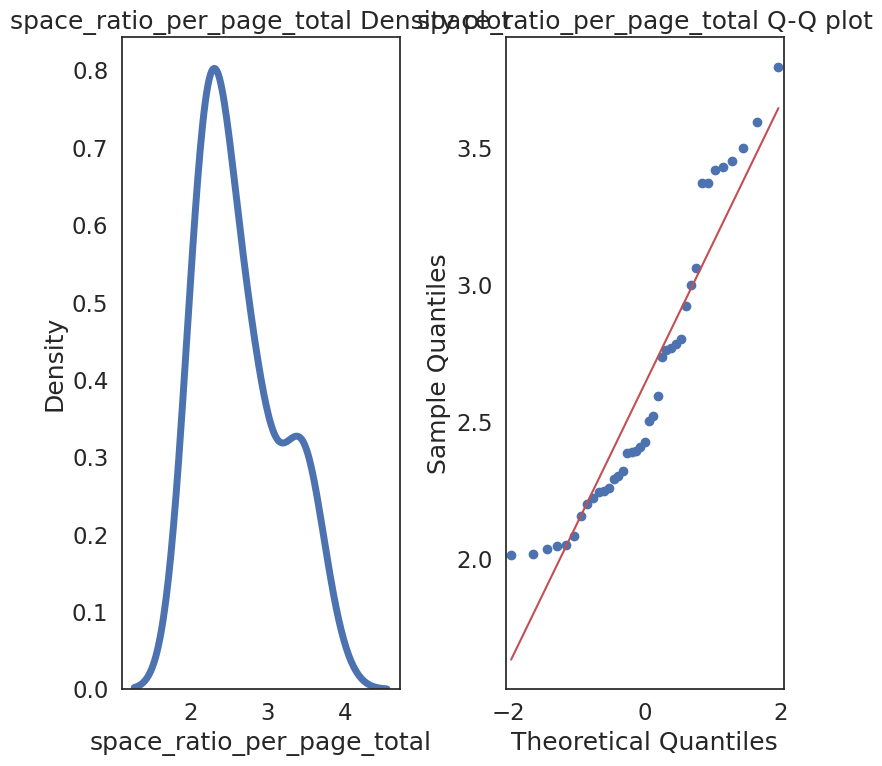

In [115]:
# Box-cox transform the data in a new column
InsMod['Ins_Boxcox'], parameters = stats.boxcox(InsMod['space_ratio_per_page_total'])

# Specify desired column
col = InsMod.space_ratio_per_page_total

# Specify desired column
i_col = InsMod.Ins_Boxcox

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('space_ratio_per_page_total Density plot')

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('space_ratio_per_page_total Q-Q plot')
plt.tight_layout()
plt.show()

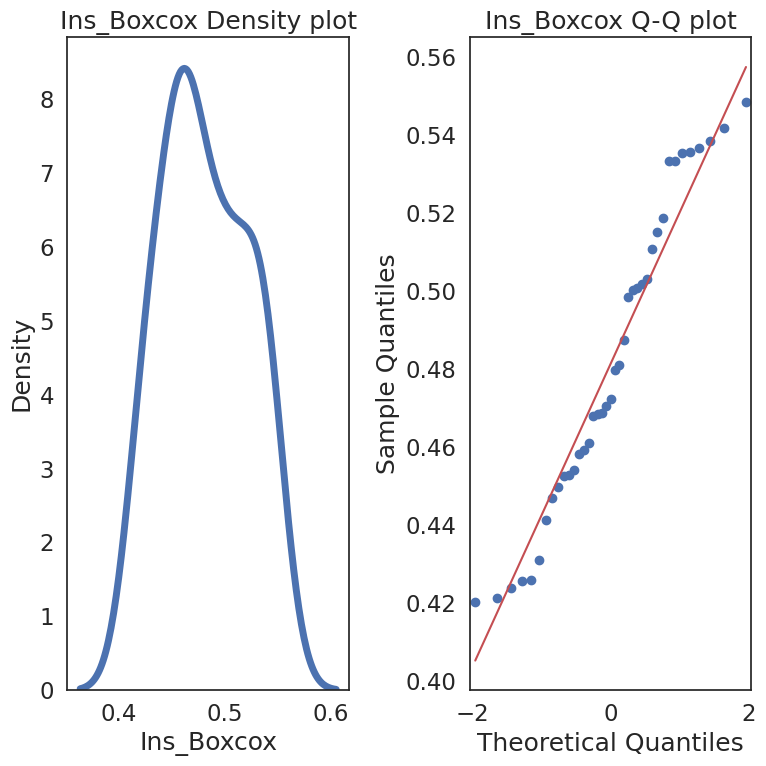

In [116]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Boxcox Density plot')

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Boxcox Q-Q plot')
plt.tight_layout()
plt.show()

###Imputing like a Data Scientist

####Required Setup

In [117]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
# Data analysis
import statistics as stat
import scipy.stats as stats
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as smx
# Predictive data analysis: process data
from sklearn import preprocessing as pproc
# Predictive data analysis: outlier imputation
from sklearn.impute import SimpleImputer
# Predictive data analysis: KNN NA imputation
from sklearn.impute import KNNImputer
# Predictive data analysis: experimental iterative NA imputer (MICE)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Predictive data analysis: linear models
from sklearn.linear_model import LinearRegression
# Predictive data analysis: Classifying nearest neighbors
from sklearn import neighbors
# Predictive data analysis: Plotting decision regions
from mlxtend.plotting import plot_decision_regions

# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

####Load and Examine a Data Set

In [118]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv')

data.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White


In [119]:
def Age_group_data(year):
    if 1926 <= year <= 1957:
        return "Young"
    elif 1957 < year <= 1980:
        return "Middle"
    else:
        return "Elderly"

# Apply the Age_group_data function to each row of the 'year' column
data['Age_group'] = data['year'].apply(Age_group_data)

# Print the updated DataFrame
print(data)

# What does the data look like
data.head()

        artist_name  edition_number  year artist_nationality  \
0     Aaron Douglas             9.0  1991           American   
1     Aaron Douglas            10.0  1996           American   
2     Aaron Douglas            11.0  2001           American   
3     Aaron Douglas            12.0  2005           American   
4     Aaron Douglas            13.0  2009           American   
...             ...             ...   ...                ...   
3157  Winslow Homer             4.0  1991           American   
3158  Winslow Homer             5.0  1995           American   
3159  Winslow Homer             6.0  2001           American   
3160  Winslow Homer             7.0  2007           American   
3161  Winslow Homer             8.0  2011           American   

     artist_nationality_other artist_gender                artist_race  \
0                    American          Male  Black or African American   
1                    American          Male  Black or African American   
2        

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi,Age_group
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White,Elderly
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White,Elderly
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White,Elderly
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White,Elderly
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White,Elderly


####Diagnose your Data

In [120]:
# What are the properties of the data
diagnose = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   artist_name                 3162 non-null   object 
 1   edition_number              3162 non-null   float64
 2   year                        3162 non-null   int64  
 3   artist_nationality          3139 non-null   object 
 4   artist_nationality_other    3162 non-null   object 
 5   artist_gender               3104 non-null   object 
 6   artist_race                 3133 non-null   object 
 7   artist_ethnicity            3104 non-null   object 
 8   book                        3162 non-null   object 
 9   space_ratio_per_page_total  3162 non-null   float64
 10  artist_unique_id            3162 non-null   int64  
 11  moma_count_to_year          3162 non-null   int64  
 12  whitney_count_to_year       3162 non-null   int64  
 13  artist_race_nwi             3162 

####Diagnose Outliers

In [121]:
# Make a copy of the data
dataCopy = data.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]

  # Define the 25th and 75th percentiles
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)

  # Define the interquartile range from the 25th and 75th percentiles defined above
  IQR = round((q75 - q25), 3)

  # Calculate the outlier cutoff
  cut_off = IQR * 1.5

  # Define lower and upper cut-offs
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)

  # Print the values
  print(' ')

  # For each value of i_col, print the 25th and 75th percentiles and IQR
  print(i_col, 'q25=', q25, 'q75=', q75, 'IQR=', IQR)

  # Print the lower and upper cut-offs
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits, print that value
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())

 
edition_number q25= 5.0 q75= 12.0 IQR= 7.0
lower, upper: -5.5 22.5
Number of Outliers:  0
 
year q25= 1986.0 q75= 2009.0 IQR= 23.0
lower, upper: 1951.5 2043.5
Number of Outliers:  131
 
space_ratio_per_page_total q25= 0.308 q75= 0.594 IQR= 0.286
lower, upper: -0.121 1.023
Number of Outliers:  272
 
artist_unique_id q25= 108.0 q75= 305.75 IQR= 197.75
lower, upper: -188.625 602.375
Number of Outliers:  0
 
moma_count_to_year q25= 0.0 q75= 5.0 IQR= 5.0
lower, upper: -7.5 12.5
Number of Outliers:  269
 
whitney_count_to_year q25= 0.0 q75= 0.0 IQR= 0.0
lower, upper: 0.0 0.0
Number of Outliers:  652


####Basic Exploration of Missing Values (NAs)

In [122]:
dataNA = data

for col in dataNA.columns:
    dataNA.loc[dataNA.sample(frac = 0.1).index, col] = np.nan

dataNA.isnull().sum()

artist_name                   316
edition_number                316
year                          316
artist_nationality            337
artist_nationality_other      316
artist_gender                 367
artist_race                   340
artist_ethnicity              370
book                          316
space_ratio_per_page_total    316
artist_unique_id              316
moma_count_to_year            316
whitney_count_to_year         316
artist_race_nwi               316
Age_group                     316
dtype: int64

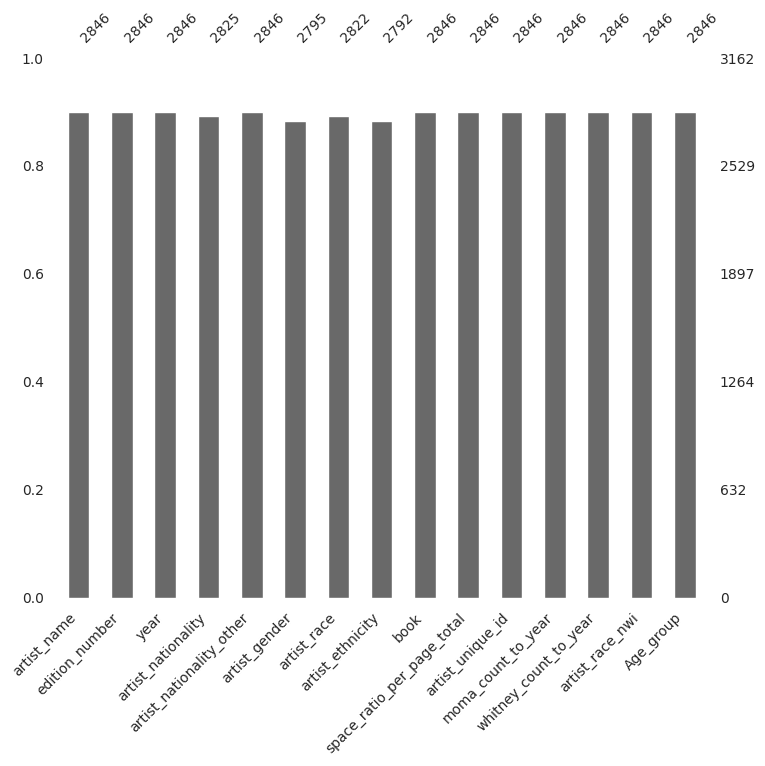

In [123]:
msno.bar(dataNA, figsize = (8, 8), fontsize = 10)
plt.tight_layout()

####Advanced Exploration of Missing Values (NAs)

<Axes: >

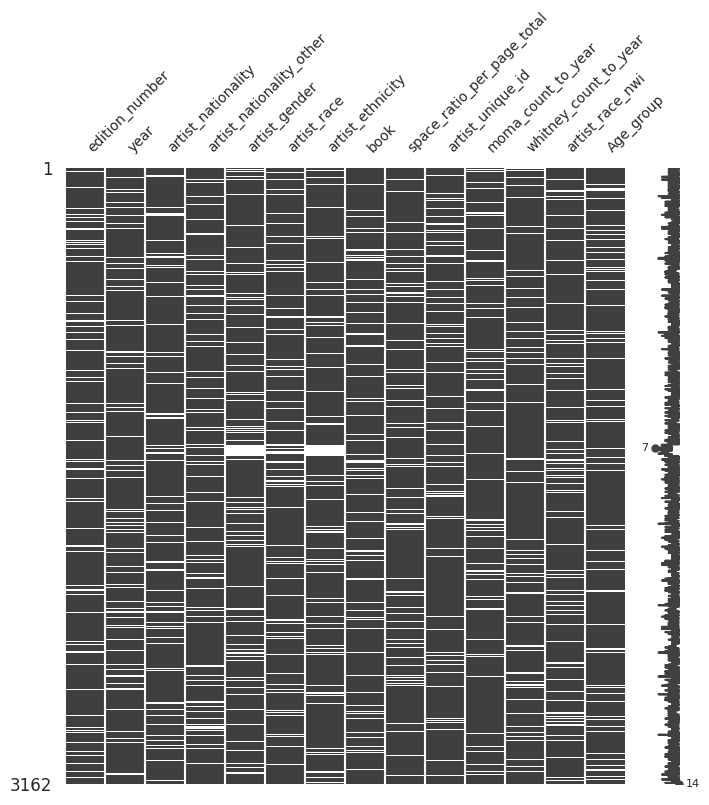

In [124]:
dataNA1 = dataNA.drop('artist_name', axis = "columns")

# NA matric
msno.matrix(dataNA1, figsize = (8, 8), fontsize = 10)

####Impute Outliers

#####Classifying Outliers

[Text(0, 0.5, 'Age group')]

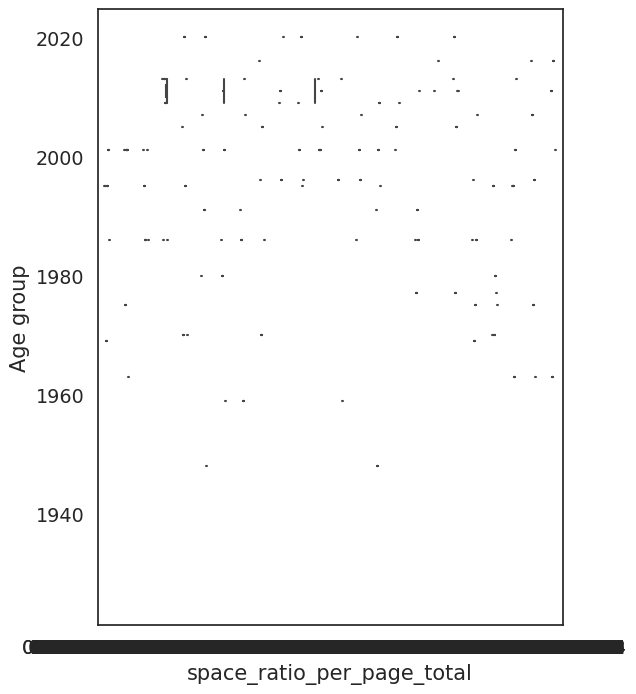

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase font size of all seaborn plot elements
sns.set(font_scale=1.25, rc={'figure.figsize': (6, 8)})

# Change theme to "white"
sns.set_style("white")

# Box plot
Age_Box = sns.boxplot(data=data, x="space_ratio_per_page_total", y="year", width=0.3)

# Tweak the visual presentation
Age_Box.set(ylabel="Age group")

In [126]:
# Select only Year
InsMod = data.filter(["space_ratio_per_page_total"], axis = "columns")

In [127]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
InsMod.loc[InsMod.space_ratio_per_page_total > 1.00, 'space_ratio_per_page_total'] = np.nan

# Set mean imputation algorithm
Mean_Impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Fit imputation
Mean_Impute = Mean_Impute.fit(InsMod[['space_ratio_per_page_total']])

# Transform NAs with the mean imputation
InsMod['Ins_Mean'] = Mean_Impute.transform(InsMod[['space_ratio_per_page_total']])

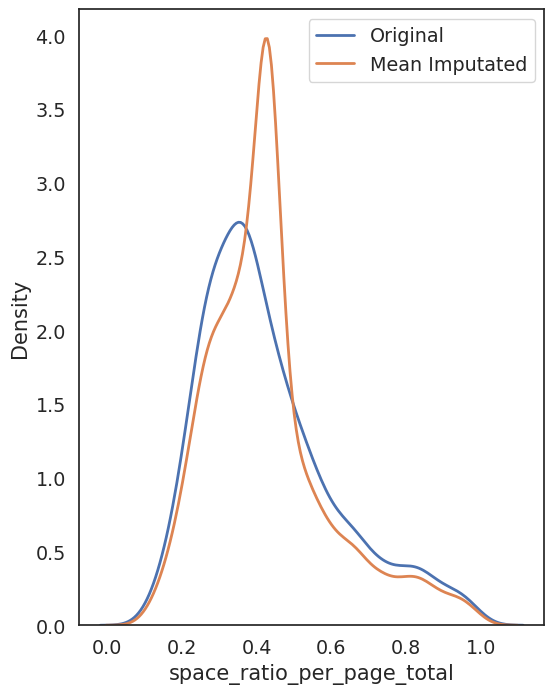

In [128]:
# Visualization of the mean imputation
# Original data
mean_plot = sns.kdeplot(data = InsMod, x = 'space_ratio_per_page_total', linewidth = 2, label = "Original")

# Mean imputation
mean_plot = sns.kdeplot(data = InsMod, x = 'Ins_Mean', linewidth = 2, label = "Mean Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

#####Median Imputation

In [129]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
InsMod.loc[InsMod.space_ratio_per_page_total > 1.00, 'space_ratio_per_page_total'] = np.nan

# Set median imputation algorithm
Median_Impute = SimpleImputer(missing_values = np.nan, strategy = 'median')

# Fit imputation
Median_Impute = Median_Impute.fit(InsMod[['space_ratio_per_page_total']])

# Transform NAs with the median imputation
InsMod['Ins_Median'] = Median_Impute.transform(InsMod[['space_ratio_per_page_total']])

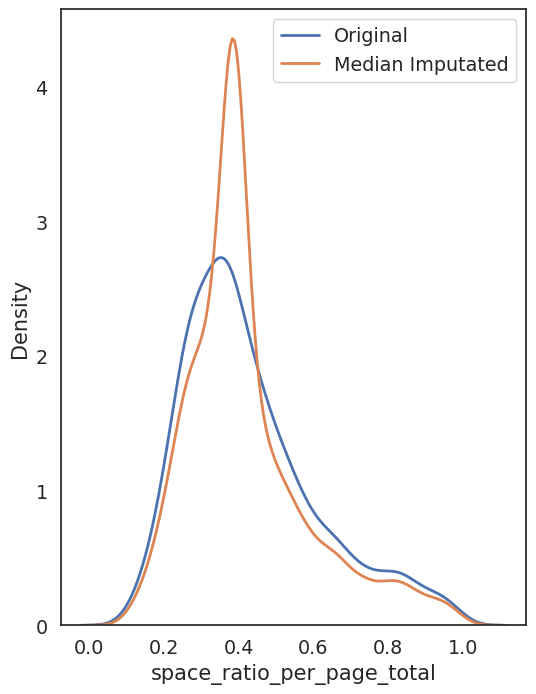

In [130]:
# Visualization of the median imputation
# Original data
median_plot = sns.kdeplot(data = InsMod, x = 'space_ratio_per_page_total', linewidth = 2, label = "Original")

# Median imputation
median_plot = sns.kdeplot(data = InsMod, x = 'Ins_Median', linewidth = 2, label = "Median Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

#####Mode Imputation

In [131]:
# Python can't impute outliers easily, so we will convert them to NAs and imputate them
InsMod.loc[InsMod.space_ratio_per_page_total > 1.00, 'space_ratio_per_page_total'] = np.nan

# Set mode imputation algorithm
Mode_Impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Fit imputation
Mode_Impute = Mode_Impute.fit(InsMod[['space_ratio_per_page_total']])

# Transform NAs with the mode imputation
InsMod['Ins_Mode'] = Mode_Impute.transform(InsMod[['space_ratio_per_page_total']])

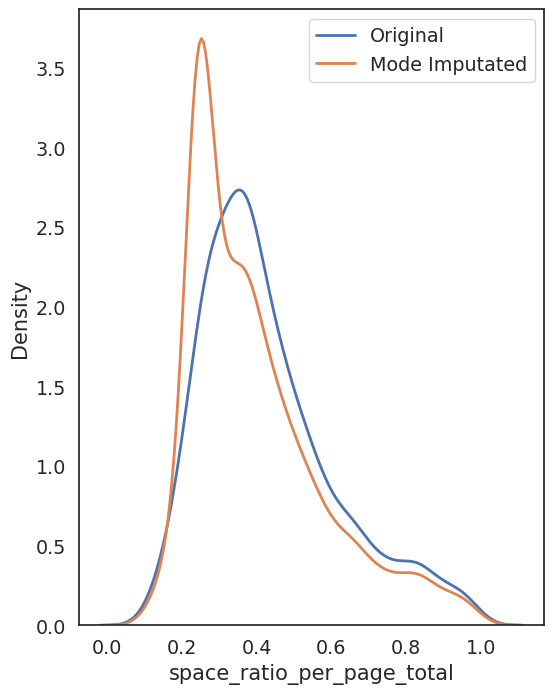

In [132]:
# Visualization of the mode imputation
# Original data
mode_plot = sns.kdeplot(data = InsMod, x = 'space_ratio_per_page_total', linewidth = 2, label = "Original")

# Mode imputation
mode_plot = sns.kdeplot(data = InsMod, x = 'Ins_Mode', linewidth = 2, label = "Mode Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

#####Capping Imputation (aka Winsorizing)

In [133]:
# Winsorizing deals specifically with outliers, so we don't have to worry about changing outliers to NAs

# New column for capping imputated data at the lowest and highest 10% of values
InsMod['Ins_Cap'] = pd.DataFrame(stats.mstats.winsorize(InsMod['space_ratio_per_page_total'], limits = [0.05, 0.05]))

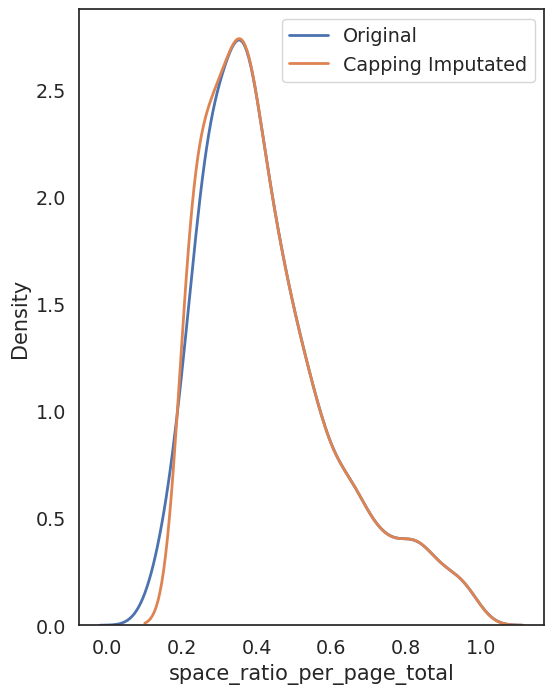

In [134]:
# Visualization of the capping imputation
# Original data
cap_plot = sns.kdeplot(data = InsMod, x = 'space_ratio_per_page_total', linewidth = 2, label = "Original")

# Capping imputation
cap_plot = sns.kdeplot(data = InsMod, x = 'Ins_Cap', linewidth = 2, label = "Capping Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

####Imputing NAs

In [135]:
# Make a copy of the data
dataCopy = data.copy()

# Select the space_ratio_per_page_total
InsNA = dataNA.filter(["space_ratio_per_page_total"], axis = "columns")

# Add space_ratio_per_page_total with NAs to copy of original data
dataCopy['space_ratio_per_page_total'] = InsNA

#####K-Nearest Neighbor (KNN) Imputation

In [136]:
# KNN plot function
def knn_comparision(data, k):
  # Define x and y values (your data will need to have these)
    X = data[['x1','x2']].values
    y = data['y'].astype(int).values
    # Knn function, defining the number of neighbors
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    # Fit knn algorithm to data
    clf.fit(X, y)

    # Plotting decision regions
    plot_decision_regions(X, y, clf = clf, legend = 2)

    # Adding axes annotations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [142]:
def Age_num_data(Age_group):
    if Age_group == "Young":
        return 1
    elif Age_group == "Middle":
        return 2
    else:
        return 3

# Apply the Age_num_data function to each row of the 'Age_group' column
data['Age_num'] = data['Age_group'].apply(Age_num_data)

# Print the updated DataFrame
print(data)

# What does the data look like
data.head()

        artist_name  edition_number    year artist_nationality  \
0     Aaron Douglas             9.0  1991.0           American   
1     Aaron Douglas            10.0  1996.0           American   
2               NaN            11.0  2001.0           American   
3     Aaron Douglas            12.0  2005.0           American   
4     Aaron Douglas            13.0  2009.0           American   
...             ...             ...     ...                ...   
3157  Winslow Homer             4.0  1991.0           American   
3158  Winslow Homer             5.0  1995.0           American   
3159  Winslow Homer             6.0  2001.0           American   
3160            NaN             7.0  2007.0           American   
3161  Winslow Homer             8.0  2011.0           American   

     artist_nationality_other artist_gender                artist_race  \
0                    American          Male  Black or African American   
1                    American          Male  Black or Afric

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi,Age_group,Age_num
0,Aaron Douglas,9.0,1991.0,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2.0,0.0,0.0,Non-White,Elderly,3
1,Aaron Douglas,10.0,1996.0,American,American,Male,Black or African American,Not Hispanic or Latino origin,NaN,0.373947,2.0,0.0,0.0,Non-White,Elderly,3
2,NaN,11.0,2001.0,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2.0,0.0,NaN,Non-White,Elderly,3
3,Aaron Douglas,12.0,2005.0,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2.0,0.0,0.0,Non-White,Elderly,3
4,Aaron Douglas,13.0,2009.0,American,American,Male,Black or African American,NaN,Gardner,0.398410,2.0,0.0,0.0,Non-White,Elderly,3


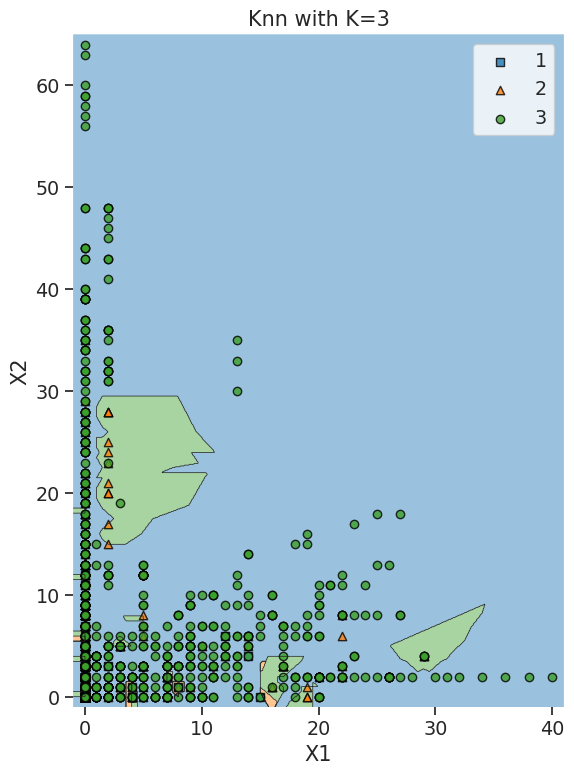

In [138]:
# Prepare data for the KNN plotting function
data1 = data.loc[:, ['whitney_count_to_year', 'moma_count_to_year', 'Age_num']]

# Drop NAs
data1 = data1.dropna()

# Set the two target x variables and the binary y variable we are clustering the data from
data1 = data1.rename(columns = {'whitney_count_to_year': 'x1', 'moma_count_to_year': 'x2', 'Age_num': 'y'})

# Create KNN plot for 3 nearest neighbors
knn_comparision(data1, 3)

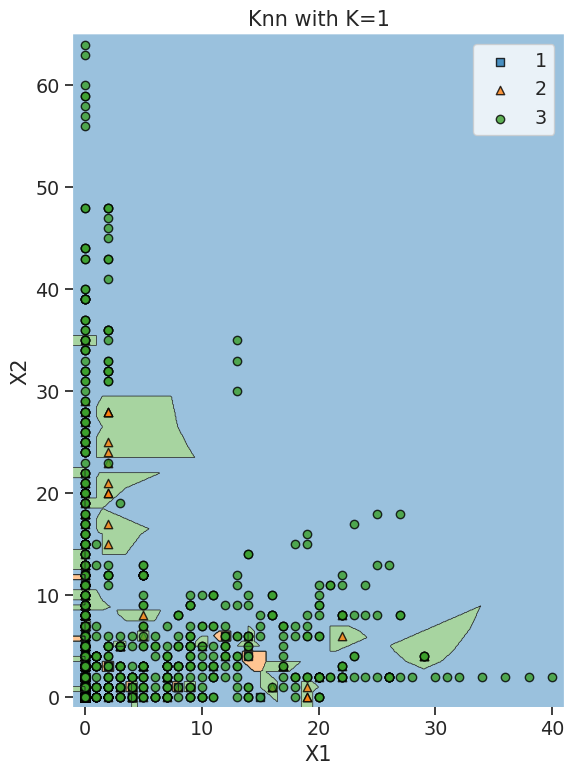

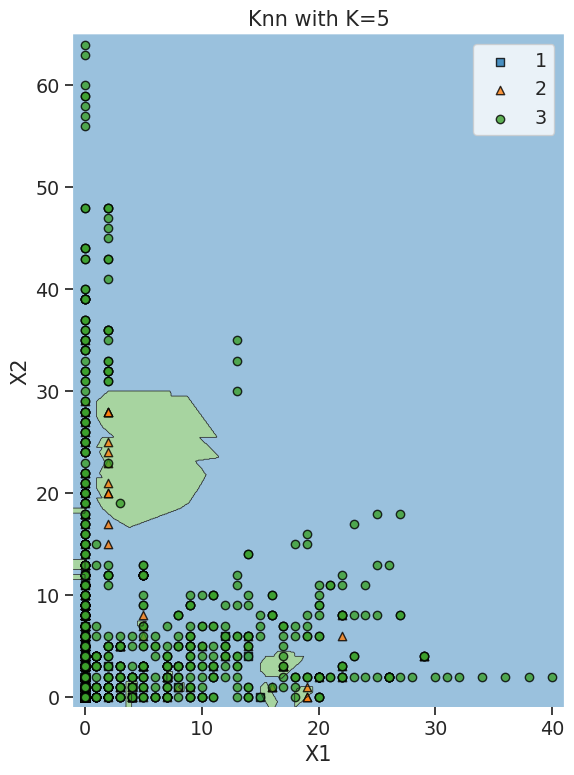

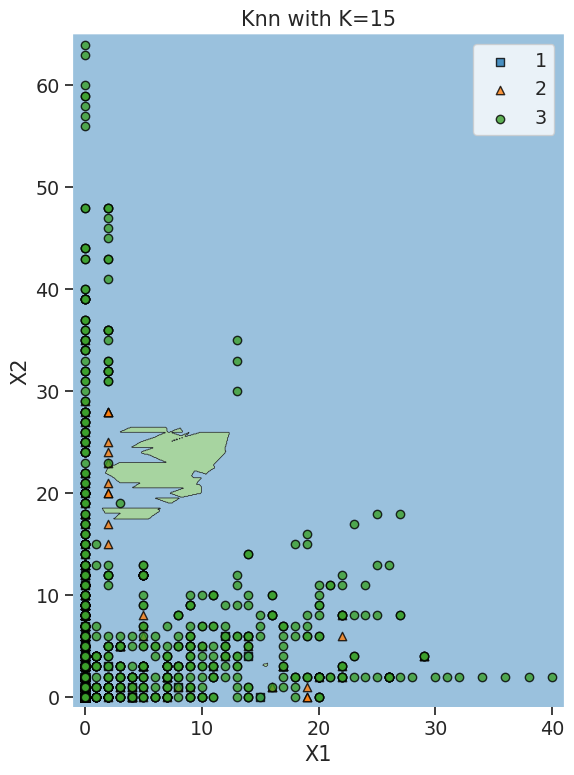

In [139]:
# Loop to create KNN plots for i number of nearest neighbors
for i in [1, 5, 15]:
  knn_comparision(data1, i)

In [140]:
# Numeric dummy variable from our Age_group ordinal column
# Define the orginal encoder
enc = pproc.OrdinalEncoder()

# Ordinal variable from Age_group column
dataCopy[['Age_group']] = enc.fit_transform(data[['Age_group']])

In [145]:
# Reorder columns
dataCopy = data[['edition_number','year','space_ratio_per_page_total','artist_unique_id','moma_count_to_year','whitney_count_to_year','Age_num']]

In [146]:
# Min-max schaler
scaler = pproc.MinMaxScaler()

# Scale columns
dataCopy_Scale = pd.DataFrame(scaler.fit_transform(dataCopy), columns = dataCopy.columns)

In [147]:
# Min-max schaler
scaler = pproc.MinMaxScaler()

# Scale columns
dataCopy_Scale = pd.DataFrame(scaler.fit_transform(dataCopy), columns = dataCopy.columns)

In [148]:
# Set KNN imputation function parameters
imputer = KNNImputer(n_neighbors = 3)

# Fit imputation
DataKnn = pd.DataFrame(imputer.fit_transform(dataCopy_Scale),columns = dataCopy_Scale.columns)

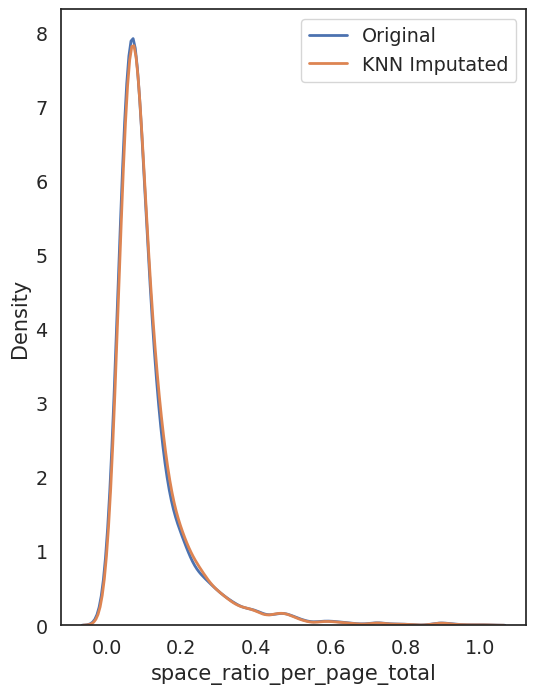

In [149]:
# Add KNN imputated column to original dataCopy
dataCopy_Scale[['InsKnn']] = DataKnn[['space_ratio_per_page_total']]

# Visualization of the KNN imputation
# Original data
knn_plot = sns.kdeplot(data = dataCopy_Scale, x = 'space_ratio_per_page_total', linewidth = 2, label = "Original")

# KNN imputation
knn_plot = sns.kdeplot(data = dataCopy_Scale, x = 'InsKnn', linewidth = 2, label = "KNN Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

#####Multivariate Imputation by Chained Equations (MICE)

In [150]:
# Assign a regression model
lm = LinearRegression()

# Set MICE imputation function parameters
imputer = IterativeImputer(estimator = lm, missing_values = np.nan, max_iter = 10, verbose = 2, imputation_order = 'roman', random_state = 0)

# Fit imputation
dataMice = pd.DataFrame(imputer.fit_transform(dataCopy),columns = dataCopy.columns)

[IterativeImputer] Completing matrix with shape (3162, 7)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 55.34028898625172, scaled tolerance: 2.02 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.06
[IterativeImputer] Change: 13.933669402523783, scaled tolerance: 2.02 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.10
[IterativeImputer] Change: 8.48103340906768, scaled tolerance: 2.02 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.12
[IterativeImputer] Change: 5.137536205587846, scaled tolerance: 2.02 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.15
[IterativeImputer] Change: 3.1118117223877335, scaled tolerance: 2.02 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.17
[IterativeImputer] Change: 1.8848112649945143, scaled tolerance: 2.02 
[IterativeImputer] Early stopping criterion reached.


<ipython-input-151-30d36e91f240>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCopy[['InsMice']] = dataMice[['space_ratio_per_page_total']]


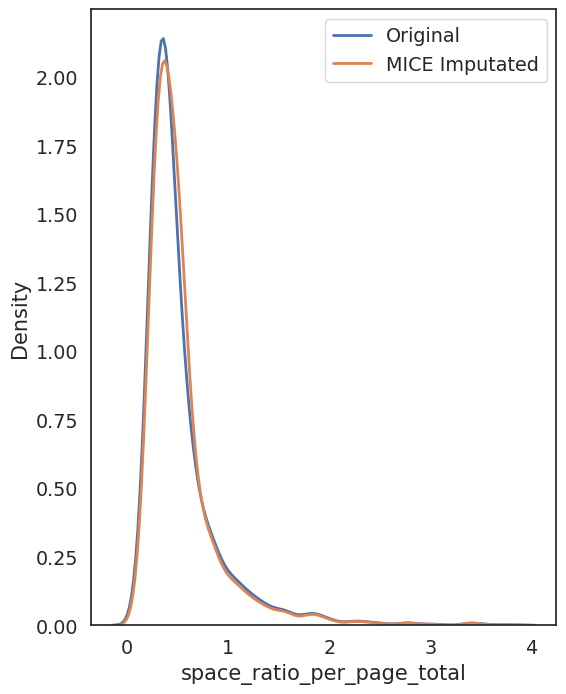

In [151]:
# Add MICE imputated column to original dataCopy
dataCopy[['InsMice']] = dataMice[['space_ratio_per_page_total']]

# Visualization of the MICE imputation
# Original data
mice_plot = sns.kdeplot(data = dataCopy, x = 'space_ratio_per_page_total', linewidth = 2, label = "Original")

# MICE imputation
mice_plot = sns.kdeplot(data = dataCopy, x = 'InsMice', linewidth = 2, label = "MICE Imputated")

# Show legend
plt.legend()

# Show plot
plt.show()

###Correlating Like a Data Master

####Required setup

In [152]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Data analysis
import statistics as stat
import scipy.stats as stats
# Two-sample Chi-Square test
from scipy.stats import chi2_contingency
# Predictive data analysis: process data
from sklearn import preprocessing as pproc
# Predictive data analysis: linear models
from sklearn.model_selection import cross_val_predict
# Predictive data analysis: linear models
from sklearn.linear_model import LinearRegression
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as sm
# Statistical modeling: ANOVA
from statsmodels.formula.api import ols
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

####Load the Examine a Data Set

In [159]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv')

data.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White


####Describe and Visualize Correlations

In [160]:
# subset dataframe to include only numeric columns
numData = data.select_dtypes(include='number')

# Table of correlations between numerical variables (we are sticking to the default Pearson's r coefficient)
numData.corr()

,edition_number,year,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year
edition_number,1.000000,0.787895,-0.050169,-0.009188,0.028904,0.110288
year,0.787895,1.000000,-0.058054,-0.031929,0.091178,0.106158
space_ratio_per_page_total,-0.050169,-0.058054,1.000000,0.031816,0.185175,-0.104279
artist_unique_id,-0.009188,-0.031929,0.031816,1.000000,0.054564,-0.050969
moma_count_to_year,0.028904,0.091178,0.185175,0.054564,1.000000,0.035872
whitney_count_to_year,0.110288,0.106158,-0.104279,-0.050969,0.035872,1.000000


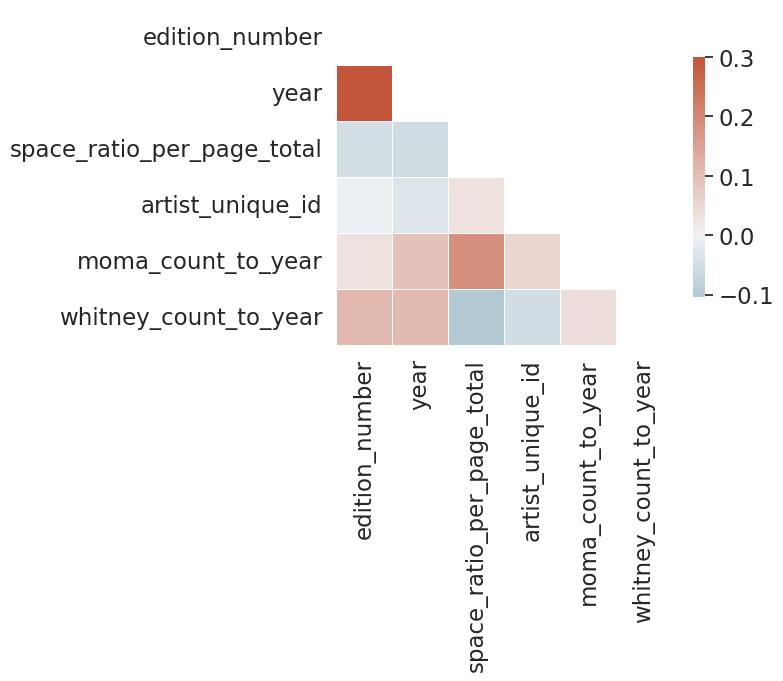

In [161]:
# Heatmap correlation matrix of numerical variables
# Correlation matrix
corr = numData.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Heatmap of the correlation matrix
sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})

# Tight margins for plot
plt.tight_layout()

# Show plot
plt.show()

####Visualize Correlations within Groups

In [162]:
def Age_group_data(year):
    if 1926 <= year <= 1957:
        return "Young"
    elif 1957 < year <= 1980:
        return "Middle"
    else:
        return "Elderly"

# Apply the Age_group_data function to each row of the 'year' column
data['Age_group'] = data['year'].apply(Age_group_data)

# Print the updated DataFrame
print(data)

# What does the data look like
data.head()

        artist_name  edition_number  year artist_nationality  \
0     Aaron Douglas             9.0  1991           American   
1     Aaron Douglas            10.0  1996           American   
2     Aaron Douglas            11.0  2001           American   
3     Aaron Douglas            12.0  2005           American   
4     Aaron Douglas            13.0  2009           American   
...             ...             ...   ...                ...   
3157  Winslow Homer             4.0  1991           American   
3158  Winslow Homer             5.0  1995           American   
3159  Winslow Homer             6.0  2001           American   
3160  Winslow Homer             7.0  2007           American   
3161  Winslow Homer             8.0  2011           American   

     artist_nationality_other artist_gender                artist_race  \
0                    American          Male  Black or African American   
1                    American          Male  Black or African American   
2        

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi,Age_group
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White,Elderly
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White,Elderly
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White,Elderly
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White,Elderly
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White,Elderly


<ipython-input-164-fc18d5a6d6b4>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr = data.groupby('Age_group').corr()


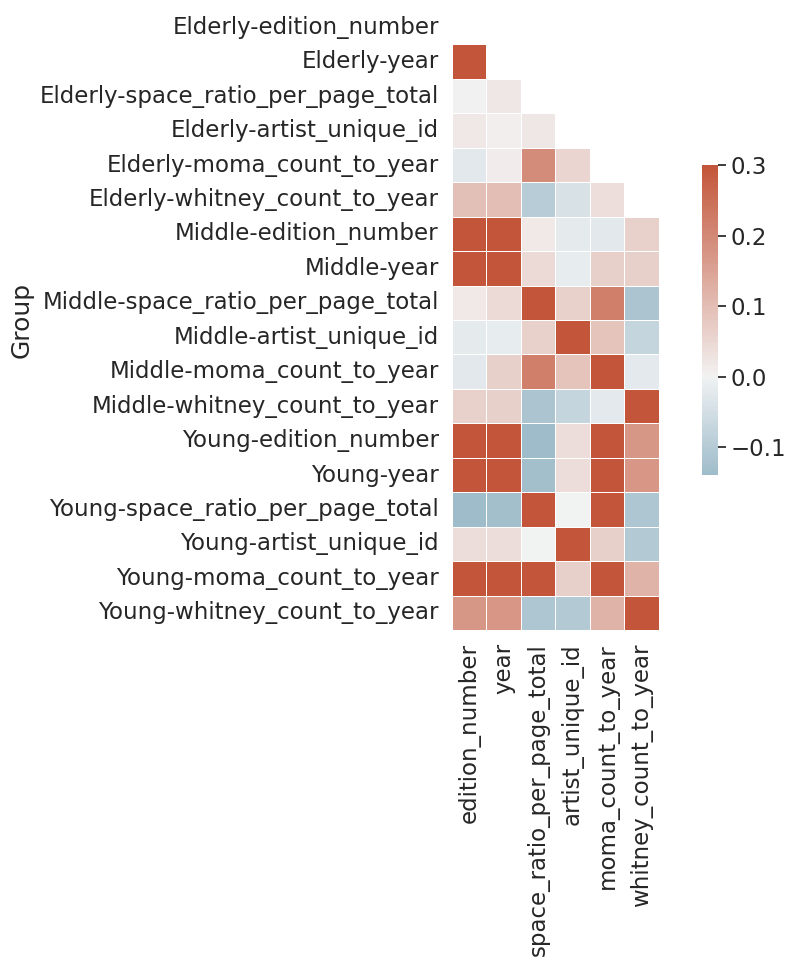

In [164]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(10, 10)})

# Change theme to "white"
sns.set_style("white")

# Heatmap correlation matrix of numerical variables
# Correlation matrix
corr = data.groupby('Age_group').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Heatmap of the correlation matrix
ax = sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})

# Change y-axis label
ax.set(ylabel = 'Group')

# Tight margins for plot
plt.tight_layout()

# Show plot
plt.show()

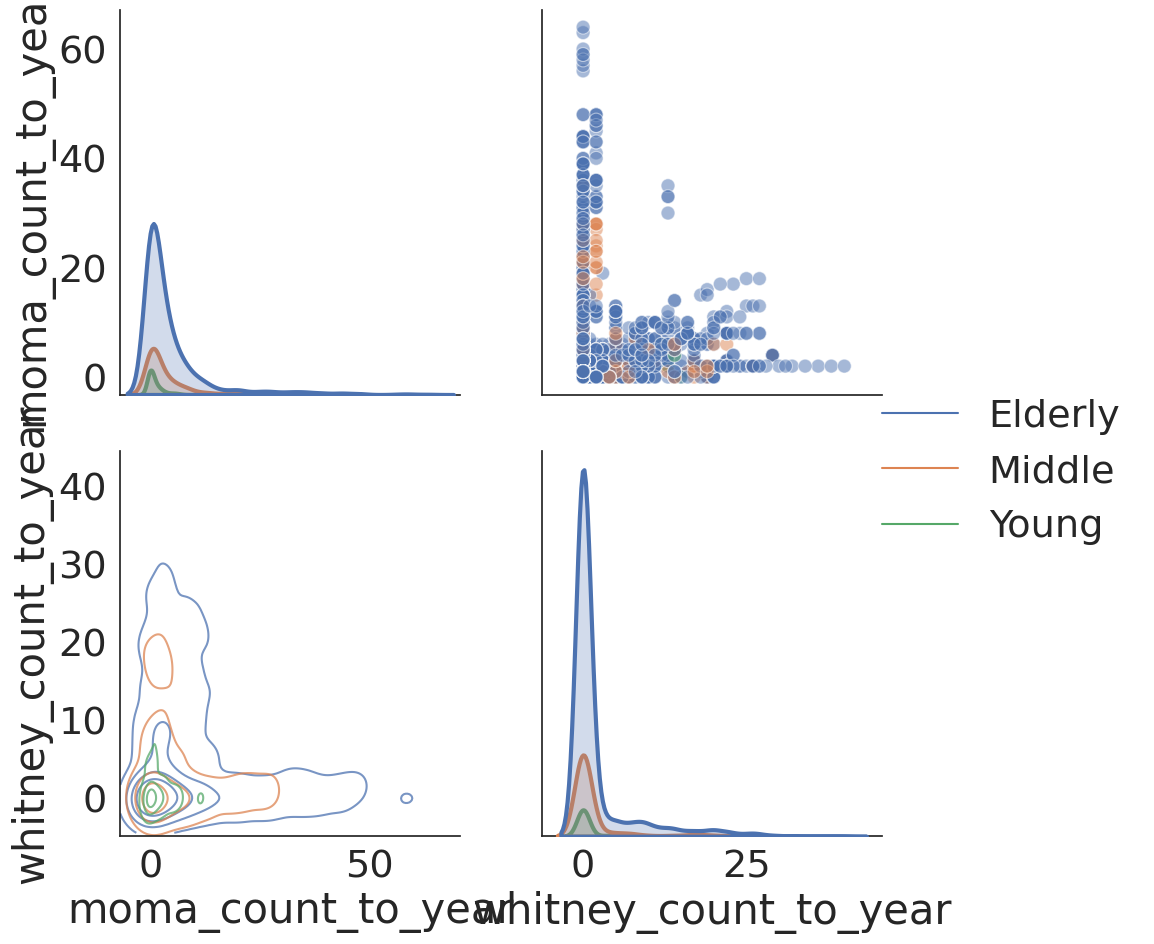

In [167]:
dataplot = data[["Age_group", "moma_count_to_year", "whitney_count_to_year"]]

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 2.5, rc = {'figure.figsize':(10, 10)})

# Change seaborn plot theme to white
sns.set_style("white")

# Empty subplot grid for pairwise relationships
g = sns.PairGrid(dataplot, hue = "Age_group", height = 5)

# Add scatterplots to the upper portion of the grid
g1 = g.map_upper(sns.scatterplot, alpha = 0.5, s = 100)

# Add a kernal density plot to the diagonal of the grid
g2 = g1.map_diag(sns.kdeplot, fill = True, linewidth = 3)

# Add a kernal density plot to the lower portion of the grid
g3 = g2.map_lower(sns.kdeplot, levels = 5, alpha = 0.75)

# Remove legend title
g4 = g3.add_legend(title = "", adjust_subtitles = True)

# Show plot
plt.show()

####Describe and Visualize Relationships Based on Target Variables

#####Target Variables

In [ ]:
#Target variables are essentially numerical or categorical variables that you want to
#relate others to in a data frame.

#The relationships below will have the formula relationship target ~ predictor.

####Numerical Target Variables: Numerical Variable of Interest

In [168]:
# The numerical predictor variable
X = data[["moma_count_to_year"]]

# The numerical target variable
Y = data[["whitney_count_to_year"]]

# Define the linear model, drop NAs
model = sm.OLS(Y, X, missing = 'drop')

# Fit the model
model_result = model.fit()

# Summary of the linear model
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     whitney_count_to_year   R-squared (uncentered):                   0.040
Model:                               OLS   Adj. R-squared (uncentered):              0.040
Method:                    Least Squares   F-statistic:                              131.8
Date:                   Wed, 04 Oct 2023   Prob (F-statistic):                    6.31e-30
Time:                           02:01:11   Log-Likelihood:                         -9838.0
No. Observations:                   3162   AIC:                                  1.968e+04
Df Residuals:                       3161   BIC:                                  1.968e+04
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
moma_count_to_year     0.1246      0.011     11.482      0.000       0.103       0.146
==============================================================================
Omnibus:                     2030.782   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18950.528
Skew:                           3.054   Prob(JB):                         0.00
Kurtosis:                      13.322   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

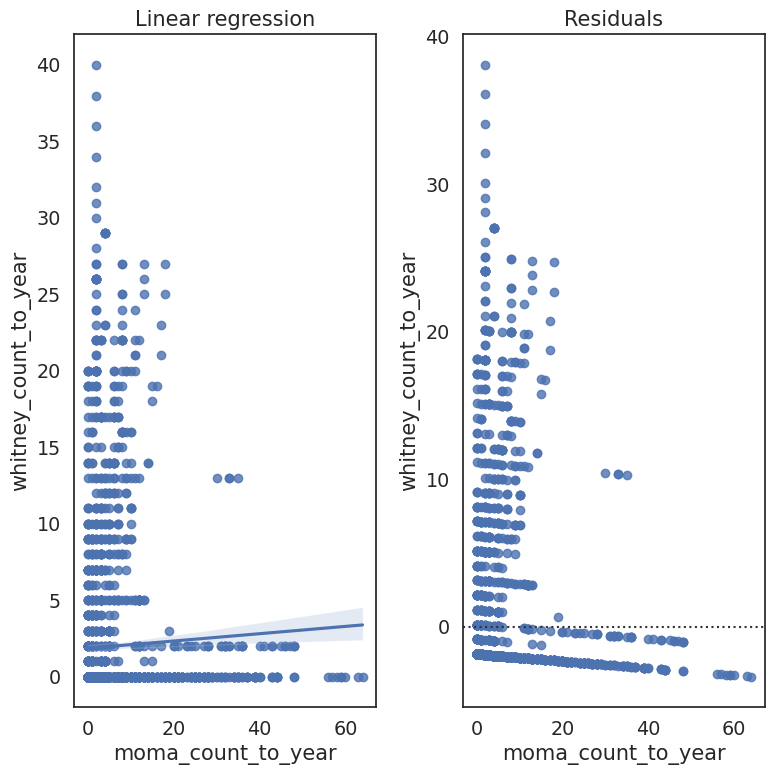

In [169]:
# Plotting the linear relationship

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(8, 8)})

# Change seaborn plot theme to white
sns.set_style("white")

# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Regression plot between moma_count_to_year and whitney_count_to_year
sns.regplot(data = data, x = "moma_count_to_year", y = "whitney_count_to_year", ax = ax1)

# Set regression plot title
ax1.set_title("Linear regression")

# Regression plot between moma_count_to_year and whitney_count_to_year
sns.residplot(data = data, x = "moma_count_to_year",
              y = "whitney_count_to_year", ax = ax2)

# Set residual plot title
ax2.set_title("Residuals")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()

####Numerical Target Variables: Categorical Variable of Interest

In [171]:
model = ols('whitney_count_to_year ~ C(Age_group)', data = data).fit()

sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Age_group),386.180943,2.0,7.200473,0.000759
Residual,84712.883257,3159.0,NaN,NaN


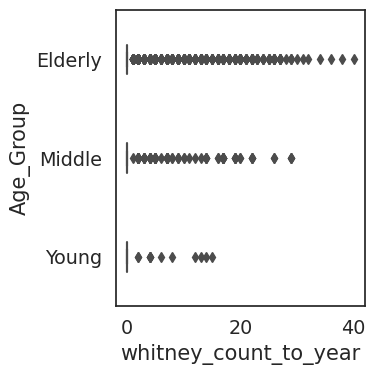

In [173]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(4, 4)})

# Change seaborn plot theme to white
sns.set_style("white")

# Box plot
Group_Box = sns.boxplot(data = data, x = "whitney_count_to_year", y = "Age_group", width = 0.3)

# Tweak the visual presentation
Group_Box.set(ylabel = "Age_Group")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()

####Categorical Target Variables: Numerical Variable of Interest

In [174]:
# Grouped describe by one column, stacked
Groups = data.groupby('Age_group').describe().unstack(1)

# Print all rows
print(Groups.to_string())

                                   Age_group
edition_number              count  Elderly      2447.000000
                                   Middle        584.000000
                                   Young         131.000000
                            mean   Elderly         9.549653
                                   Middle          3.995890
                                   Young           2.297710
                            std    Elderly         3.984522
                                   Middle          2.268870
                                   Young           0.730592
                            min    Elderly         3.000000
                                   Middle          1.000000
                                   Young           1.000000
                            25%    Elderly         6.000000
                                   Middle          2.000000
                                   Young           2.000000
                            50%    Elderly         9.00

####Categorical Target Variables: Categorical Variable of Interest

In [175]:
data1 = data.dropna()
Qual = stat.mean(data1.whitney_count_to_year + stat.stdev(data1.whitney_count_to_year))

# Create HighLWP from the age column
def HighLWP_data(data):
  if data.whitney_count_to_year >= Qual: return "Yes"
  else: return "No"

# Apply the function to data and create a dataframe
HighLWP = pd.DataFrame(data1.apply(HighLWP_data, axis = 1))

# Name new column
HighLWP.columns = ['HighLWP']

# Concatenate the two dataframes
data1 = pd.concat([data1, HighLWP], axis = 1)

# First six rows of new dataset
data1.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi,Age_group,HighLWP
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White,Elderly,No
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White,Elderly,No
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White,Elderly,No
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White,Elderly,No
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White,Elderly,No


In [176]:
obs = pd.crosstab(data1.Age_group, data1.HighLWP)
print(obs)

HighLWP      No  Yes
Age_group           
Elderly    2124  275
Middle      538   40
Young       118    5


In [177]:
# Chi-square test
chi2, p, dof, ex = chi2_contingency(obs, correction = False)

# Interpret
alpha = 0.05

# Print the interpretation
print('Statistic = %.3f, p = %.3f' % (chi2, p))

Statistic = 15.801, p = 0.000


In [178]:
if p > alpha:
  print('Chi-square value is not greater than critical value (fail to reject H0)')
else:
    print('Chi-square value is greater than critical value (reject H0)')

Chi-square value is greater than critical value (reject H0)


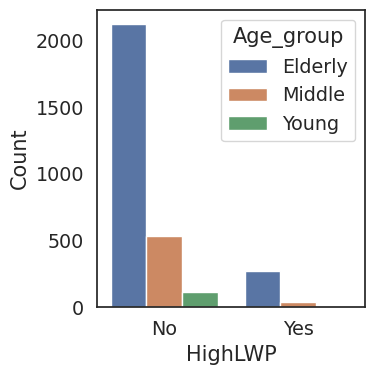

In [180]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25)

# Change seaborn plot theme to white
sns.set_style("white")

# Count plot of HighLWP grouped by Group
counts = sns.countplot(data = data1, x = "HighLWP", hue = "Age_group")

# Tweak the visual presentation
counts.set(ylabel = "Count")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()